Let's start by loading the required modules:

* matplotlib for data visualization
* numpy for data manipulation
* NiBabel for NIfTI data management

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib

Load NIfTI image and get the data

In [3]:
img = nib.load("NIFTI_DATA/LUNG-001/ct.nii.gz")
img_data = img.get_fdata()

Get the mid indices for x,y and z

In [4]:
xm = img_data.shape[0]//2
ym = img_data.shape[1]//2
zm = img_data.shape[2]//2

now let's fetch the correction factors for yz and yx plots

In [6]:
x_dim, y_dim, z_dim, t_dim = img.header.get_zooms()
yz_corr = y_dim / z_dim
xz_corr = x_dim / z_dim
xy_corr = x_dim / y_dim

2D plot of the cetral axis in each direction and histogram in HU.

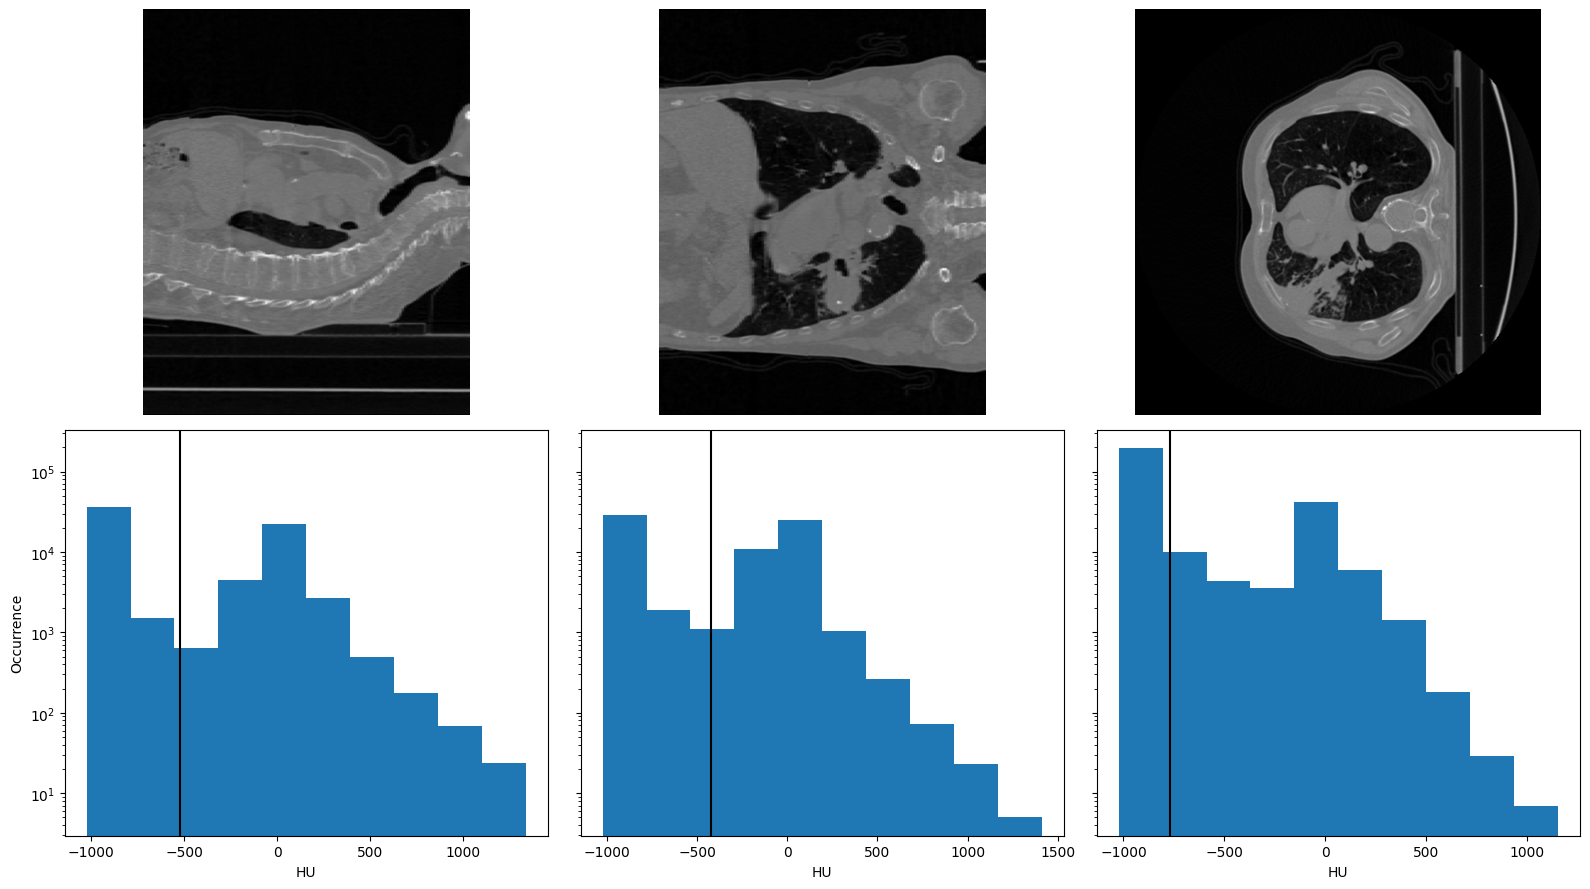

In [11]:
fig, ax = plt.subplots(2,3,figsize=(16,9),tight_layout=True,sharey="row")
ax[0,0].imshow(img_data[xm,...,0],aspect=yz_corr,cmap="gray")
ax[0,1].imshow(img_data[:,ym,:,0],aspect=xz_corr,cmap="gray")
ax[0,2].imshow(img_data[...,zm,0],aspect=xy_corr,cmap="gray")
for i in range(3):
    ax[0,i].axis("off")
ax[1,0].hist(img_data[xm,...].ravel())
ax[1,0].axvline(img_data[xm,...].ravel().mean(),color="black")
ax[1,1].hist(img_data[:,ym,:,0].ravel())
ax[1,1].axvline(img_data[:,ym,:,0].ravel().mean(),color="black")
ax[1,2].hist(img_data[...,zm,0].ravel())
ax[1,2].axvline(img_data[...,zm,0].ravel().mean(),color="black")
for i in range(3):
    ax[1,i].set_yscale("log")
    ax[1,i].set_xlabel("HU")
ax[1,0].set_ylabel("Occurrence")
plt.show()
plt.close()

In [ ]:
print(img.header.get_zooms())

In [10]:
print(img.shape)

(512, 512, 134, 1)
